In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
import statsmodels.api as sm


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [75]:
house_df = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/regresyon/house-prices-advanced-regression-techniques/train.csv")

In [76]:
house_int_64_df = house_df.select_dtypes(include = ["int64"]).copy()

house_float64_df = house_df.select_dtypes(include = ["float64"]).copy()

house_object_df = house_df.select_dtypes(include = ["object"]).copy()

numaric = pd.concat([house_float64_df,house_int_64_df],axis = 1)

In [77]:
copy_house1 = house_df.copy()
a = copy_house1.groupby("Neighborhood")["LotFrontage"].mean()
numaric["GarageYrBlt"].fillna(numaric["YearBuilt"], inplace = True)


for i in range(len(copy_house1)):
    for v in range(len(a)) :
        if copy_house1["Neighborhood"][i] == a.index[v] or copy_house1["LotFrontage"][i]=="nan":
            copy_house1["LotFrontage"][i] = a.values[v]

numaric["LotFrontage"] = copy_house1["LotFrontage"]

In [78]:
b = copy_house1.groupby("BldgType")["MasVnrArea"].mean()
for i in range(len(copy_house1)):
    for v in range(len(b)) :
        if copy_house1["BldgType"][i] == b.index[v] or copy_house1["MasVnrArea"][i]=="nan":
            copy_house1["MasVnrArea"][i] = b.values[v]
numaric["MasVnrArea"] = copy_house1["MasVnrArea"]

In [79]:
numaric.isnull().sum()*100/len(numaric)

LotFrontage     0.000
MasVnrArea      0.000
GarageYrBlt     0.000
Id              0.000
MSSubClass      0.000
LotArea         0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
BsmtFinSF1      0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFinSF    0.000
GrLivArea       0.000
BsmtFullBath    0.000
BsmtHalfBath    0.000
FullBath        0.000
HalfBath        0.000
BedroomAbvGr    0.000
KitchenAbvGr    0.000
TotRmsAbvGrd    0.000
Fireplaces      0.000
GarageCars      0.000
GarageArea      0.000
WoodDeckSF      0.000
OpenPorchSF     0.000
EnclosedPorch   0.000
3SsnPorch       0.000
ScreenPorch     0.000
PoolArea        0.000
MiscVal         0.000
MoSold          0.000
YrSold          0.000
SalePrice       0.000
dtype: float64

In [80]:
copy_house1.drop(['MiscFeature', 'Fence','PoolQC','Alley','FireplaceQu'], axis=1,inplace = True)
copy_house_object_df = copy_house1.select_dtypes(include = ["object"]).copy()
copy_house_object_df.isnull().sum()*100/len(copy_house_object_df)

MSZoning        0.000
Street          0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.548
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        2.534
BsmtCond        2.534
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtFinType2    2.603
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.068
KitchenQual     0.000
Functional      0.000
GarageType      5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
PavedDrive      0.000
SaleType        0.000
SaleCondition   0.000
dtype: float64

In [81]:
# Geriye kalanları bir önceki veriye göre doldurma yöntemi ile dolduralım

liste = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]

GarageCond_liste = copy_house1.GarageCond
for v in liste :   
    for i in range(len(GarageCond_liste)) :
        if pd.isnull(GarageCond_liste[i]):
            GarageCond_liste[i] = GarageCond_liste[i-1]
            
copy_house1.GarageCond.unique()  

for v in liste :
    _liste = copy_house1[v]
    for i in range(len(copy_house1)) :
        if pd.isnull(_liste[i]):
            _liste[i] = _liste[i-1]

In [82]:
copy_house_object_df = copy_house1.select_dtypes(include = ["object"]).copy()

In [83]:
copy_house_object_df.isnull().sum()*100/len(copy_house_object_df)

MSZoning        0.000
Street          0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinType2    0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.068
KitchenQual     0.000
Functional      0.000
GarageType      0.000
GarageFinish    0.000
GarageQual      0.000
GarageCond      0.000
PavedDrive      0.000
SaleType        0.000
SaleCondition   0.000
dtype: float64

In [84]:
copy_house_int_64_df = copy_house1.select_dtypes(include = ["int64"]).copy()

copy_float64_df = copy_house1.select_dtypes(include = ["float64"]).copy()

copy_numaric = pd.concat([copy_house_int_64_df,copy_float64_df],axis = 1)

liste_aykırı = copy_numaric.columns
liste_aykırı = list(liste_aykırı)
len(liste_aykırı)

liste_g = copy_numaric.columns
liste_g = list(liste_g)

winsorize_list =["w_"+liste_g[i] for i in range(len(liste_g))] 
from scipy.stats.mstats import winsorize

for i in range(len(winsorize_list)):
    copy_numaric[ winsorize_list[i]] = winsorize(copy_numaric[liste_g[i]],(0.05,0.14))
    
logartima_list =["log_"+liste_g[i] for i in range(len(liste_g))] 
for i in range(len(logartima_list)):
    copy_numaric[ logartima_list[i]] = np.log(copy_numaric[liste_g[i]])

# OBJECT İFADELERİ SALE_PRiCE A GÖRE NUMARİC DEĞERE ÇEVİRMEK


In [85]:
copy_house_object_df["SaleCondition_scale"] = np.nan
copy_numaric_winsorize_df = copy_numaric.iloc[:,38:76]
liste_cat =list(copy_house_object_df.columns)
copy_house_object_df["w_SalePrice"] = copy_numaric_winsorize_df["w_SalePrice"]
copy_house_object_df.groupby("Neighborhood")["w_SalePrice"].mean()
copy_house1[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea"]] = copy_numaric_winsorize_df[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea"]]
    

In [86]:
new_list = ["SaleCondition", "SaleType", "GarageQual", "GarageType", "Functional", "Neighborhood", "Condition2", "HouseStyle", "RoofMatl", "Exterior2nd", "Foundation", "Electrical", "Heating", "BsmtFinType2"]
for i in range(len(new_list)) :
    copy_house1[new_list[i]+"_scale"] = 0
    copy_house1[new_list[i]+"_bysellprice"] = 0

copy_house1["w_SalePrice"] = copy_numaric_winsorize_df["w_SalePrice"]

In [87]:
new_list2_by = []
for i in range(len(new_list)):
    new_list2_by.append(new_list[i] + "_bysellprice")
   

new_list3_scale = []
for i in range(len(new_list)):
     new_list3_scale.append(new_list[i] + "_scale")

In [88]:
new_list4 =new_list+new_list2_by+new_list3_scale

In [89]:
new_df = pd.DataFrame(copy_house1["SaleCondition"])
for i in new_list4:
    new_df[i]=copy_house1[i]
    
new_df["w_SalePrice"] = copy_house1["w_SalePrice"]

In [90]:
grup_index = list(new_df.groupby("SaleCondition")["w_SalePrice"].mean().index)

columns_list = ['SaleCondition', 'SaleType', 'GarageQual', 'GarageType', 'Functional',
       'Neighborhood', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior2nd',
       'Foundation', 'Electrical', 'Heating', 'BsmtFinType2']
grup = new_df.groupby("SaleCondition")["w_SalePrice"].mean()

In [91]:
for n in columns_list:
    a = new_df.groupby(n)["w_SalePrice"].mean()
    grup_index = list(new_df.groupby(n)["w_SalePrice"].mean().index)
    for i in range(len(new_df)):
        for z in grup_index:
            if new_df[n][i] == z:
                new_df[n + "_bysellprice"][i] = a[z]

In [92]:
xlist = ['SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice']
for x in xlist :
    copy_house1[x] = new_df[x]

In [93]:
from sklearn import linear_model

Y = copy_house1["w_SalePrice"]
X = copy_house1[["w_TotalBsmtSF", "w_1stFlrSF", "w_GrLivArea", "w_FullBath", "w_TotRmsAbvGrd", "w_Fireplaces", "w_GarageCars", "w_GarageArea",'SaleCondition_bysellprice', 'SaleType_bysellprice',
       'GarageQual_bysellprice', 'GarageType_bysellprice',
       'Functional_bysellprice', 'Neighborhood_bysellprice',
       'Condition2_bysellprice', 'HouseStyle_bysellprice',
       'RoofMatl_bysellprice', 'Exterior2nd_bysellprice',
       'Foundation_bysellprice', 'Electrical_bysellprice',
       'Heating_bysellprice', 'BsmtFinType2_bysellprice']]

In [179]:
copy_house1_i = copy_house1.select_dtypes(include = ["int64"]).copy()

copy_house1_f = copy_house1.select_dtypes(include = ["float64"]).copy()

son_numeric = pd.concat([copy_house1_i,copy_house1_f],axis = 1)
son_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_scale,Electrical_bysellprice,Heating_scale,Heating_bysellprice,BsmtFinType2_scale,BsmtFinType2_bysellprice,w_SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,175655,0,171922,0,172144,208500,71.683,101.948,2003.000
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,175655,0,171922,0,172144,181500,59.714,101.948,1976.000
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,175655,0,171922,0,172144,223500,71.683,101.948,2001.000
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,175655,0,171922,0,172144,140000,71.805,101.948,1998.000
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,175655,0,171922,0,172144,250000,91.879,101.948,2000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,175655,0,171922,0,172144,175000,79.878,101.948,1999.000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,175655,0,171922,0,158418,210000,81.289,101.948,1978.000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,175655,0,171922,0,172144,256000,71.805,101.948,1941.000
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,125626,0,171922,0,158418,142125,76.462,101.948,1950.000


In [180]:
son_numeric.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'w_TotalBsmtSF', 'w_1stFlrSF', 'w_GrLivArea', 'w_FullBath',
       'w_TotRmsAbvGrd', 'w_Fireplaces', 'w_GarageCars', 'w_GarageArea',
       'SaleCondition_scale', 'SaleCondition_bysellprice', 'SaleType_scale',
       'SaleType_bysellprice', 'GarageQual_scale', 'GarageQual_bysellprice',
       'GarageType_scale', 'GarageType_bysellprice', 'Functional_scale',
       'Functional_bysellprice', 'Neighborhood_scale',
       'Neighborhood_bysellprice', 'Condition2_scale',

In [181]:
son_numeric.drop(["w_SalePrice"], axis =1, inplace =True)
son_numeric.dropna(inplace=True)

## LİNER REGRITIONS

In [182]:
X = son_numeric.drop('SalePrice', axis=1)
y = son_numeric.SalePrice

In [183]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:07:56   Log-Likelihood:                -16168.
No. Observations:                1379   AIC:                         3.245e+04
Df Residuals:                    1321   BIC:                         3.275e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.539e+06   1.31e+06     -1.177      0.239    -4.1e+06    1.03e+06
Id                            0.1869      1.998      0.094      0.926      -3.733       4.107
MSSubClass                 -115.4014     28.323     -4.075      0.000    -170.963     -59.839
LotArea                       0.3083      0.093      3.298      0.001       0.125       0.492
OverallQual                 1.33e+04   1171.912     11.352      0.000     1.1e+04    1.56e+04
OverallCond                5711.6072   1046.407      5.458      0.000    3658.807    7764.408
YearBuilt                   184.5500     78.464      2.352      0.019      30.622     338.478
YearRemodAdd                 28.5242     68.111      0.419      0.675    -105.094     162.142
BsmtFinSF1                    6.2336      2.924      2.132      0.033       0.498      11.970
BsmtFinSF2                   -2.5118      4.568     -0.550      0.583     -11.473       6.449
BsmtUnfSF                   -12.3286      2.990     -4.123      0.000     -18.195      -6.462
TotalBsmtSF                  -8.6067      6.280     -1.371      0.171     -20.926       3.713
1stFlrSF                     19.3595      9.579      2.021      0.043       0.567      38.152
2ndFlrSF                     13.3947      6.910      1.938      0.053      -0.161      26.950
LowQualFinSF                 -8.2285     16.570     -0.497      0.620     -40.735      24.278
GrLivArea                    24.5257      7.216      3.399      0.001      10.370      38.681
BsmtFullBath               5142.3429   2448.665      2.100      0.036     338.646    9946.040
BsmtHalfBath               3216.9748   3757.676      0.856      0.392   -4154.688    1.06e+04
FullBath                   4.373e+04   6023.132      7.261      0.000    3.19e+04    5.55e+04
HalfBath                   4163.2240   2562.702      1.625      0.104    -864.186    9190.634
BedroomAbvGr              -8322.0084   1692.596     -4.917      0.000   -1.16e+04   -5001.539
KitchenAbvGr              -2.167e+04   5548.750     -3.905      0.000   -3.26e+04   -1.08e+04
TotRmsAbvGrd               7053.3223   2055.228      3.432      0.001    3021.455    1.11e+04
Fireplaces                 5571.6394   3184.880      1.749      0.080    -676.335    1.18e+04
GarageCars                 3.889e+04   3755.106     10.357      0.000    3.15e+04    4.63e+04
GarageArea                  -43.1114     16.869     -2.556      0.011     -76.205     -10.018
WoodDeckSF                   18.1734      7.331      2.479      0.013       3.791      32.555
OpenPorchSF                   6.7860     14.300      0.475      0.635     -21.266      34.838
EnclosedPorch                 0.1680     15.542      0.011      0.991     -30.321      30.657
3SsnPorch                    40.8611     27.818      1.469      0.142     -

## KNN REGRETION

In [186]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
X = son_numeric.drop('SalePrice', axis=1)
y = son_numeric.SalePrice
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [187]:
test_kumesi_skoru = knn.score(X_test, y_test)
test_kumesi_skoru

1.0

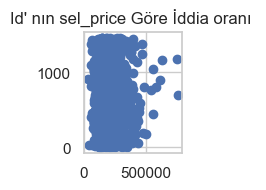

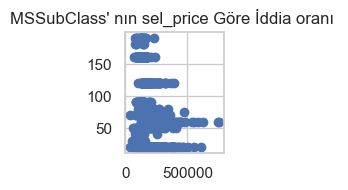

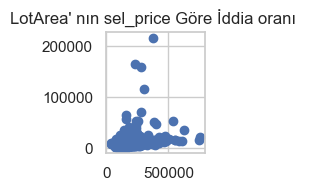

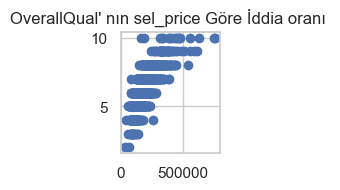

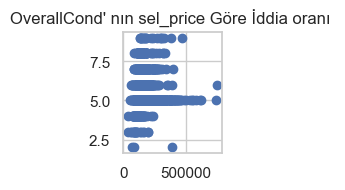

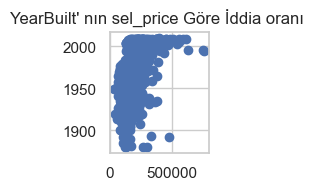

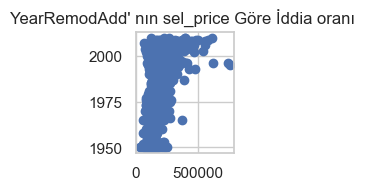

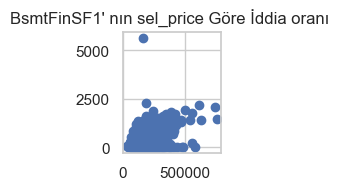

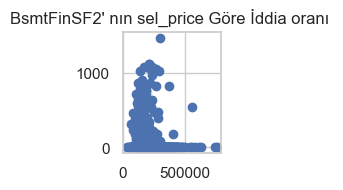

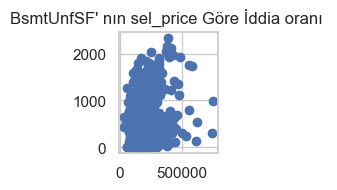

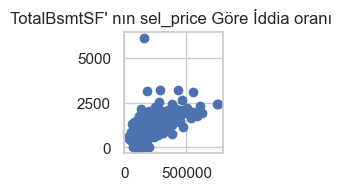

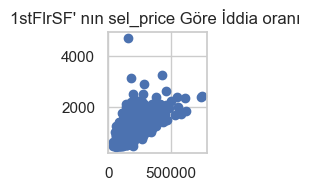

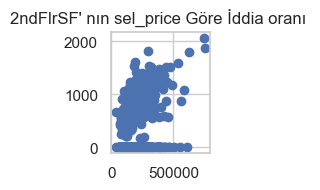

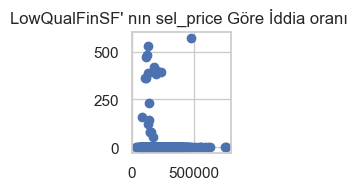

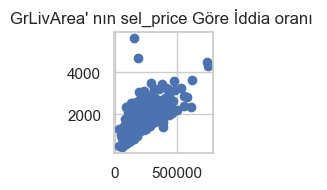

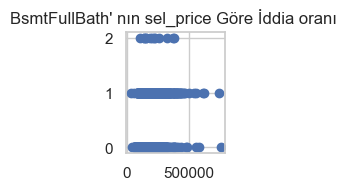

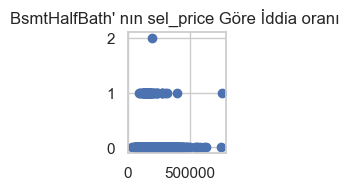

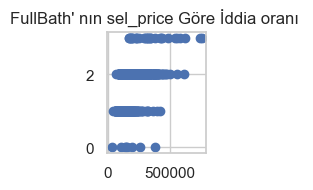

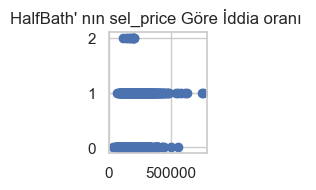

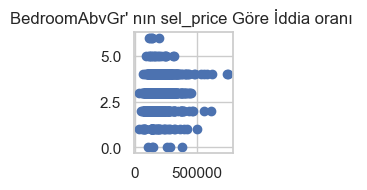

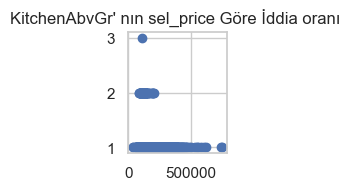

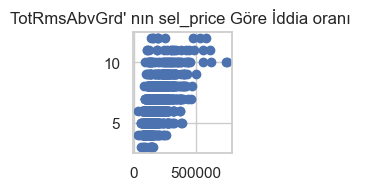

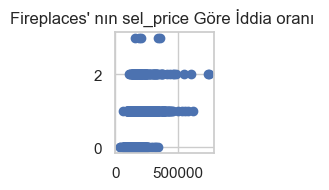

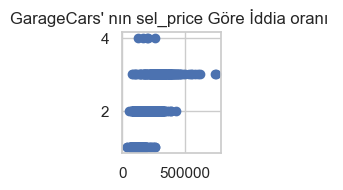

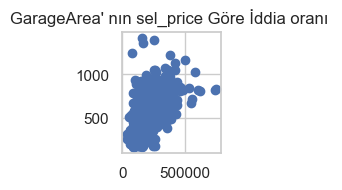

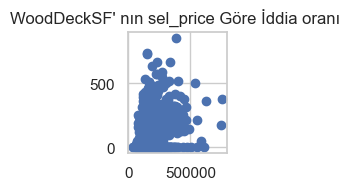

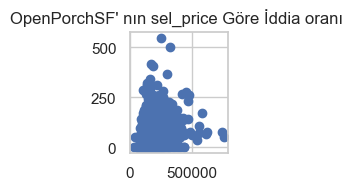

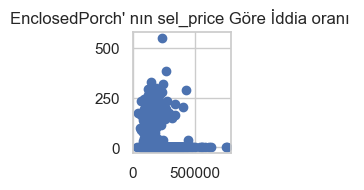

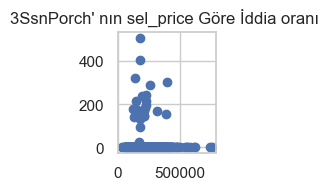

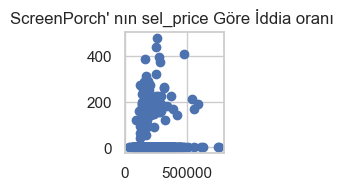

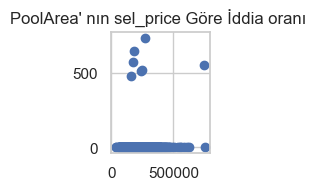

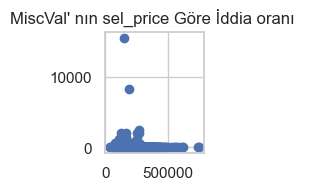

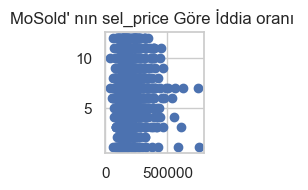

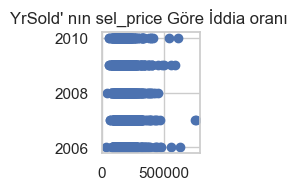

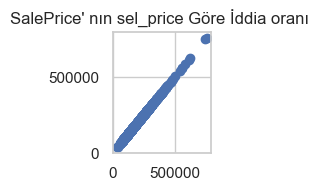

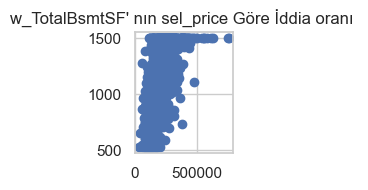

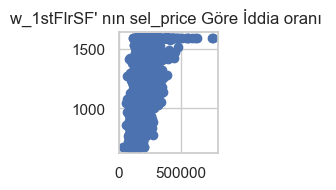

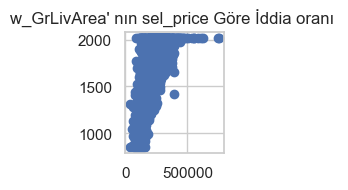

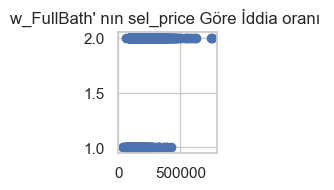

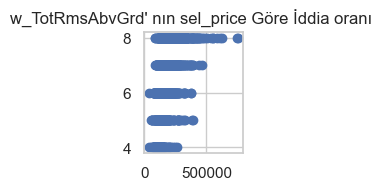

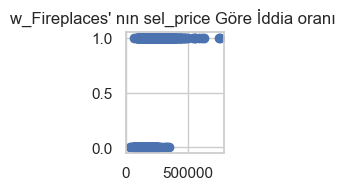

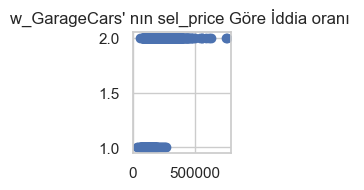

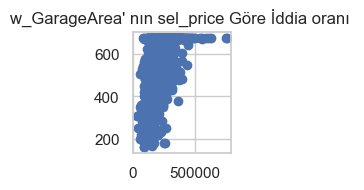

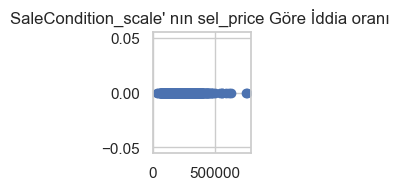

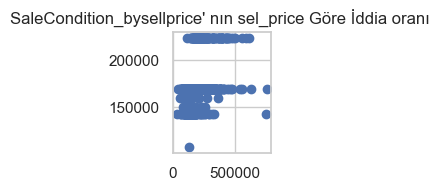

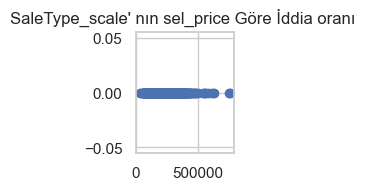

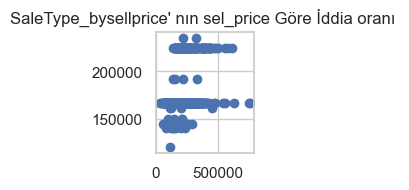

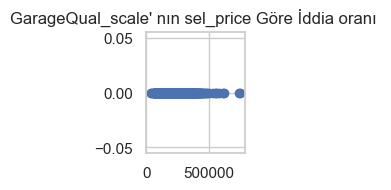

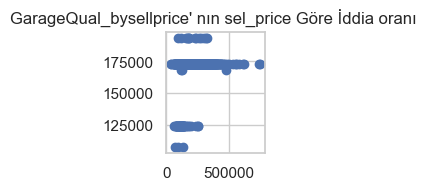

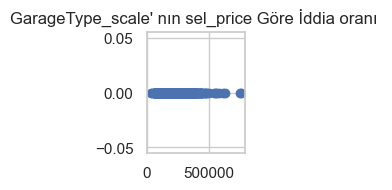

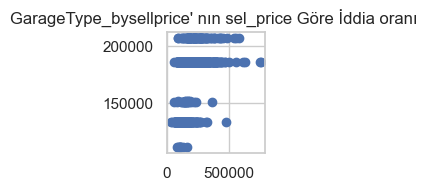

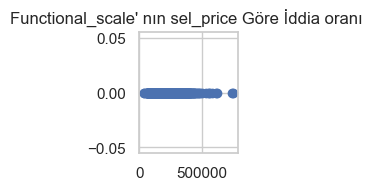

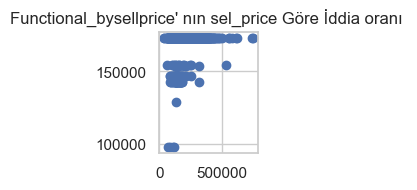

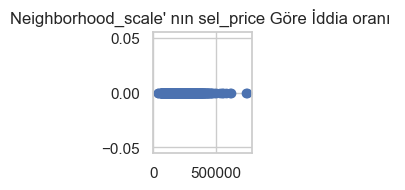

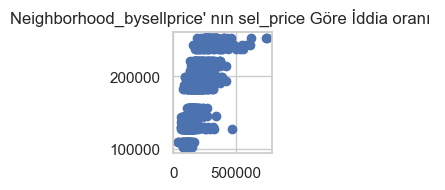

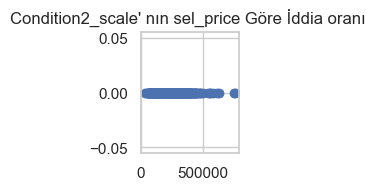

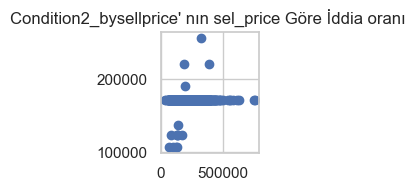

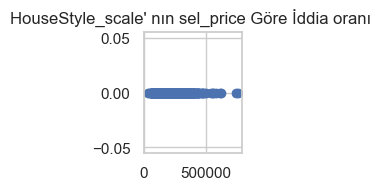

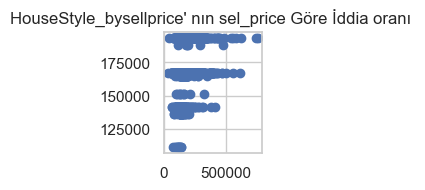

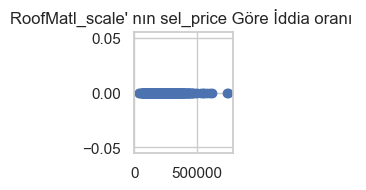

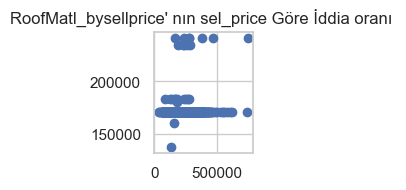

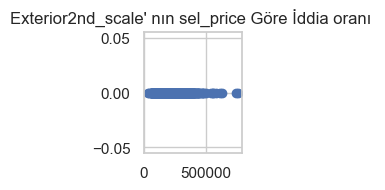

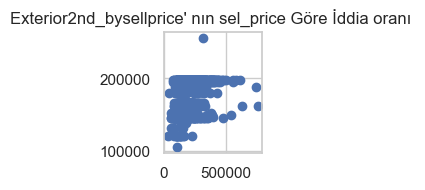

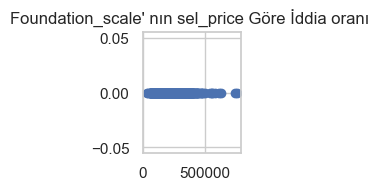

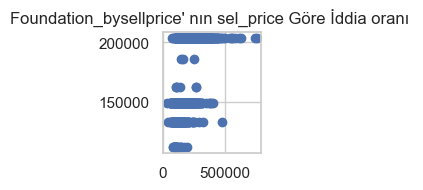

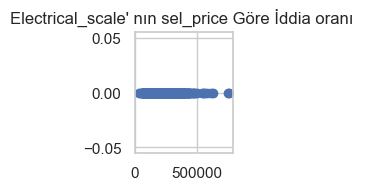

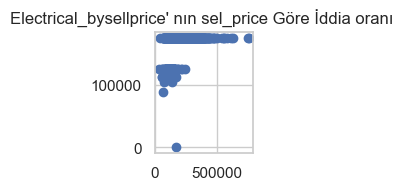

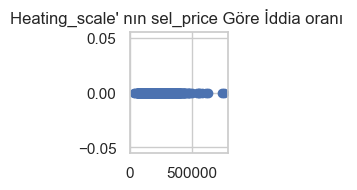

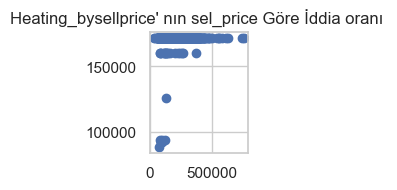

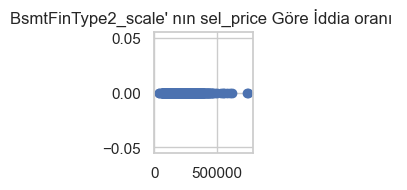

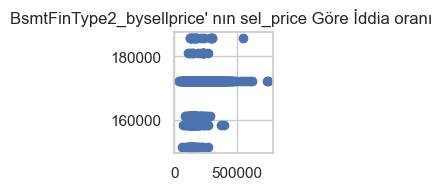

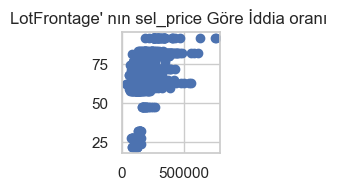

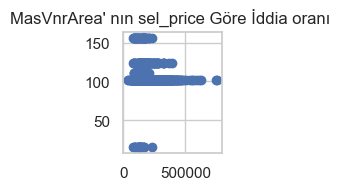

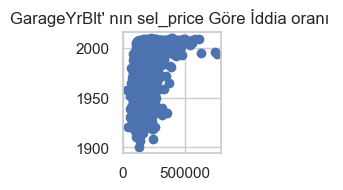

In [194]:
liste_c = list(son_numeric.columns)
for i in range (len(liste_c)):
    plt.figure(figsize = (15,15))
    plt.subplot(8,10,i+1)
    plt.scatter(son_numeric["SalePrice"],son_numeric[liste_c[i]])
    plt.title ("{}' nın sel_price Göre İddia oranı ".format(liste_c[i]))
    plt.show()

# KARAR AĞACI

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
ka_reg = DecisionTreeRegressor(max_depth=4)

ka_reg.fit(X_eğitim, y_eğitim)

DecisionTreeRegressor(max_depth=4)

In [197]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = ka_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 38202.71


In [198]:
test_kumesi_skoru = ka_reg.score(X_test, y_test)
test_kumesi_skoru

0.736861625961303